In [120]:
# import necessary packages for data analysis

import pandas as pd
import seaborn as sns
import numpy as np
import re
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt

import matplotlib
sns.set(style="ticks", color_codes=True)

In [121]:
#reading data from the dataset and storing it in a data frame
#head command displays the data as per the number of rows specified

movies_data = pd.read_csv('tmdbmovies.csv')
movies_data.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_actor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08,Arnold Schwarzenegger
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08,Matt Damon
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09,Sandra Bullock
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/2015,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler


In [122]:
movies_data.shape

(10866, 22)

In [123]:
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [124]:
#displaying data with null values

movies_data.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_actor
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
#displaying the sum of null values in each column

movies_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
leading_actor             76
dtype: int64

In [126]:
#Goal is to calculate the revenue generated by the movies based on certain columns (budget_adj is one of the identified columns)
#checking the zero values in that column
#number seems to be high

movies_data[movies_data['budget_adj']==0].count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
leading_actor           5631
dtype: int64

In [127]:
#removing unnecessary columns that are not required for analysing data
#columns to be removed: imdb_id, budget, revenue, homepage,tagline, keywords

movies_data.drop(['imdb_id','budget','revenue','keywords','homepage','tagline'],axis=1,inplace=True)

In [128]:
#verify if the above columns were dropped

movies_data.head(2)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_actor
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Chris Pratt
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Tom Hardy


In [129]:
#removing duplicate rows from the dataset
#prints all the duplicated rows from the dataset

movies_duplicated_data = movies_data[movies_data.duplicated()]
print("Duplicated rows in the dataset are as follows")
print(movies_duplicated_data)

Duplicated rows in the dataset are as follows
         id  popularity original_title  \
2090  42194     0.59643         TEKKEN   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                                               overview  runtime  \
2090  In the year of 2039, after World Wars destroy ...       92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
2090    3/20/2010         110           5.0          2010  30000000.0   

      revenue_adj leading_actor  
2090     967000.0       Jon Foo  


In [130]:
#checking the number of duplicated rows identified above

n_duplicated = movies_data.duplicated(keep="first").sum()
print("There are {}/{} duplicated records.".format(n_duplicated, movies_data.shape[0]))

There are 1/10866 duplicated records.


In [131]:
#dropping the duplicated rows identified above

movies_no_dup = movies_data.drop(movies_data.index[movies_data.duplicated()], axis=0)
print("{} records after dropping duplicated.".format(movies_no_dup.shape[0]))

10865 records after dropping duplicated.


In [132]:
#since we have removed a few columns, let's create a copy of the existing data frame so that we can use the previous one if reqd

movies = movies_no_dup.copy(deep=True)  #deep = true signifies new object


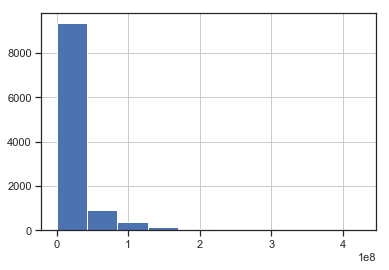

In [133]:
#Plotting a histogram will help us understand the values to be replaced by 0 values

movies['budget_adj'].hist()

In [134]:
movies.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
leading_actor             76
dtype: int64

In [135]:
#removing all rows with budget_adj == 0 and revenue_adj == 0

movies = movies[movies['budget_adj']!=0]
movies = movies[movies['revenue_adj']!=0]

In [136]:
#verifying if the rows were removed

movies.loc[movies['budget_adj'] == 0]
movies.loc[movies['revenue_adj'] == 0]

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,leading_actor


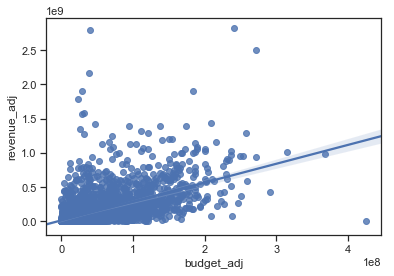

In [137]:
#Scatter plot of budget and revenue, shows  correlation between budget_adj and revenue_adj
#graph shows positive correlation between budget and revenue
sns.regplot(x="budget_adj", y="revenue_adj", data=movies);

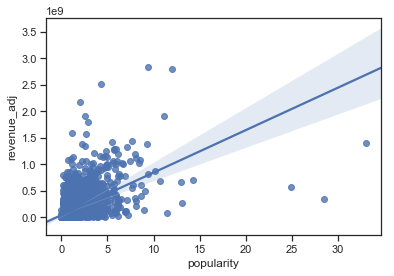

In [138]:
#let's plot a graph between popularity and revenue_adj
#graph shows positive correlation. With increase in popularity, revenue is increasing

sns.regplot(x="popularity", y="revenue_adj", data=movies);

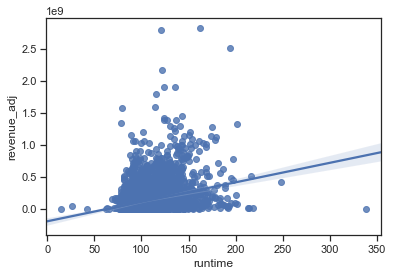

In [139]:
#There is no significant correlation between runtime and revenue

sns.regplot(x="runtime", y="revenue_adj", data=movies);

In [141]:
# Drop all null values. 
movies = movies.dropna()
# display top 30 directors as the number of rows are a lot
top_director = (movies.groupby('director')['original_title'].count()).sort_values(ascending=False)

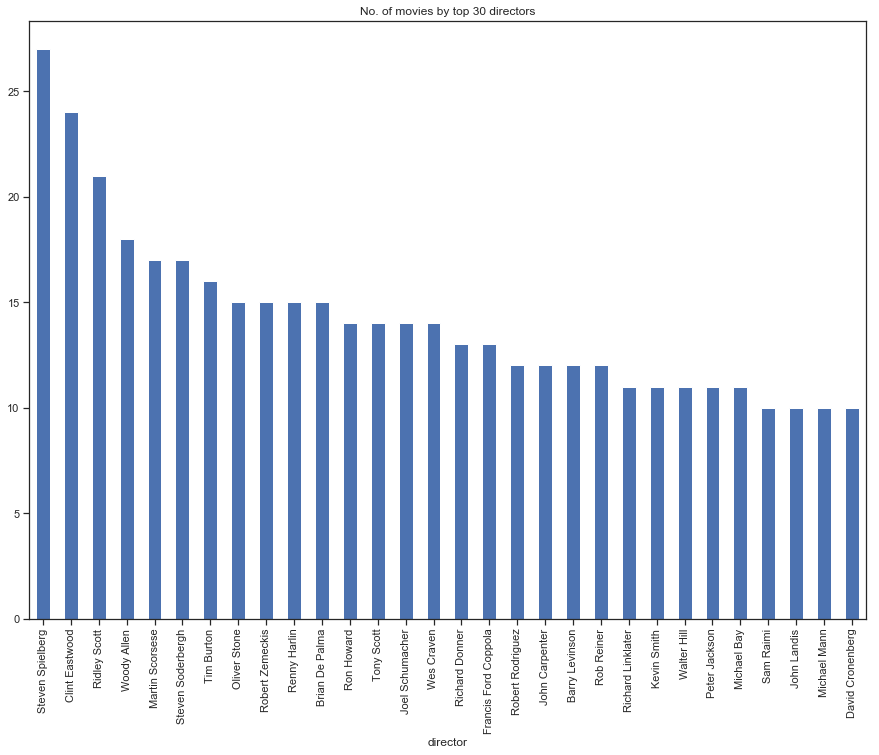

In [142]:
top_director[:30].plot(kind='bar', figsize=(15,11), title='No. of movies by top 30 directors').yaxis.label.set_visible(True);

In [147]:
#Dropping null values and calling the explode function
movies.dropna(inplace = True);
top_genres= (movies.groupby('genres')['original_title'].count()).sort_values(ascending=False)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


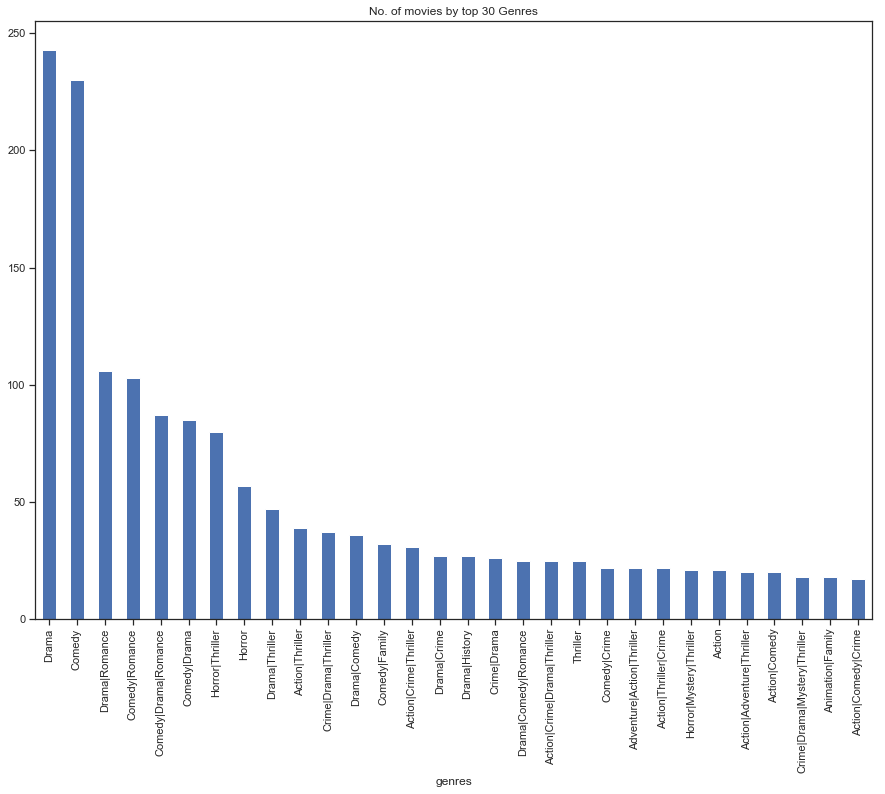

In [144]:
top_genres[:30].plot(kind='bar', figsize=(15,11), title='No. of movies by top 30 Genres').yaxis.label.set_visible(True);

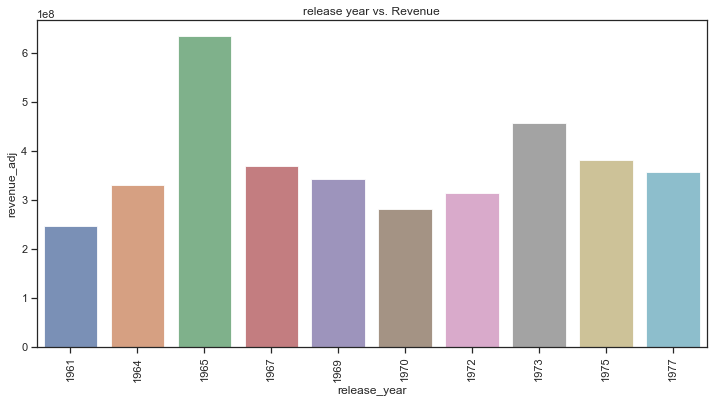

In [145]:
# Investigate leading actor's average contirbution on each single movie
# Find out the corresponding average value

lead_rev = movies.groupby(['release_year'])['revenue_adj'].sum() / movies.groupby(['release_year'])['revenue_adj'].count()

# Select the top 10 leading actors to plot

lead_rev = lead_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
ax = sns.barplot(lead_rev.index,lead_rev.tolist(), alpha = 0.8)
ax.set_title('release year vs. Revenue')
ax.set_ylabel('revenue_adj');

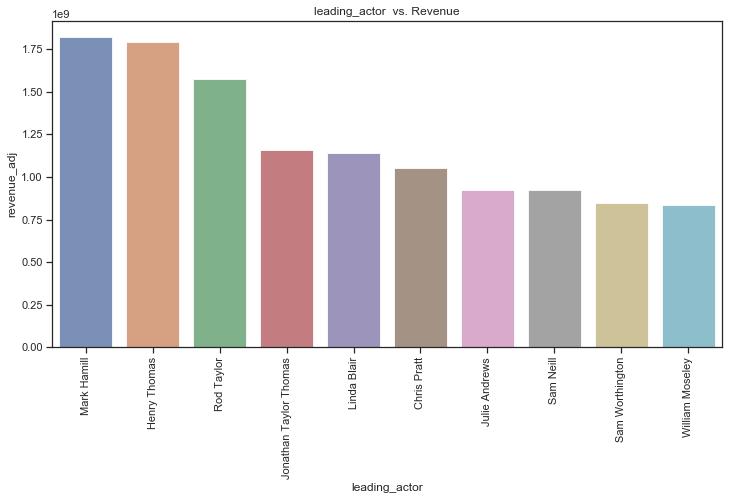

In [146]:
# Investigate leading actor's average contirbution on each single movie
# Find out the corresponding average value

lead_rev = movies.groupby(['leading_actor'])['revenue_adj'].sum() / movies.groupby(['leading_actor'])['revenue_adj'].count()

# Select the top 10 leading actors to plot

lead_rev = lead_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
ax = sns.barplot(lead_rev.index,lead_rev.tolist(), alpha = 0.8)
ax.set_title('leading_actor  vs. Revenue')
ax.set_ylabel('revenue_adj');